In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/ИАД/ambient_temperature_system_failure.csv')
df.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7267 non-null   object 
 1   value      7267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.7+ KB


In [4]:
df.isna().sum()

timestamp    0
value        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['value'] = (df['value'] - 32) * 5/9

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 113.7 KB


In [7]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=df['timestamp'], y=df['value'])])
fig.show()

In [8]:
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

In [9]:
df.head()

,timestamp,value,hour,day_of_week,month,year
0,2013-07-04 00:00:00,21.044908,0,3,7,2013
1,2013-07-04 01:00:00,21.789015,1,3,7,2013
2,2013-07-04 02:00:00,21.598781,2,3,7,2013
3,2013-07-04 03:00:00,20.533000,3,3,7,2013
4,2013-07-04 04:00:00,20.713084,4,3,7,2013


#Machine Learning

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, silhouette_score

In [11]:
X = df.drop('timestamp', axis=1)

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
models={
        "IsolationForest": IsolationForest(contamination = 0.01),
        "OneClassSVM": OneClassSVM(nu=0.95 * 0.01),
        "LocalOutlierFactor":LocalOutlierFactor()
}

models_test_pred = {}

for name, model in models.items():
  models_test_pred[name] = model.fit_predict(X_scaled)
  df[name] = pd.Series(models_test_pred[name])
  df[name] = df[name].map( {1: 0, -1: 1} )
  print(name)
  print(df[name].value_counts())

IsolationForest
0    7194
1      73
Name: IsolationForest, dtype: int64
OneClassSVM
0    7199
1      68
Name: OneClassSVM, dtype: int64
LocalOutlierFactor
0    7252
1      15
Name: LocalOutlierFactor, dtype: int64


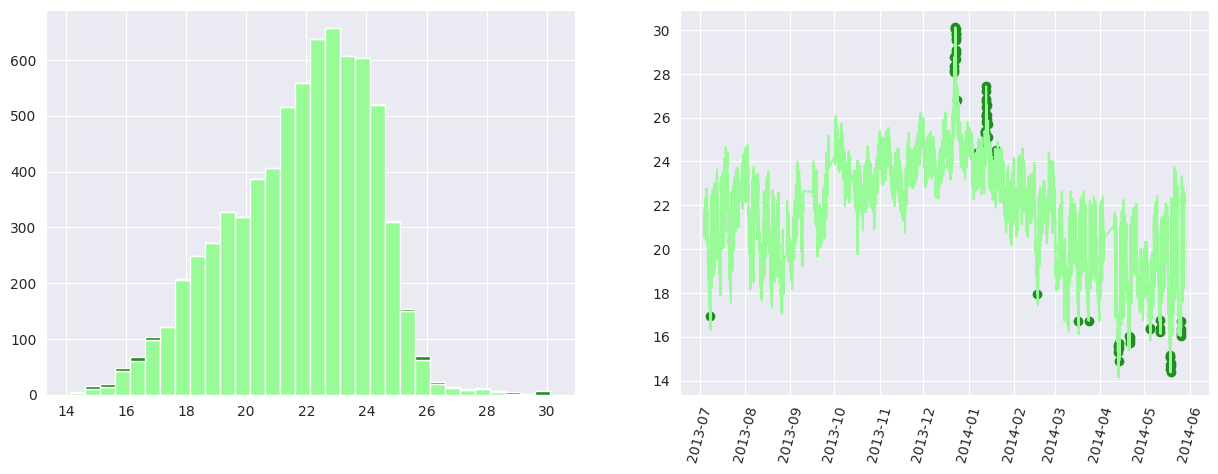

In [14]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

a = df.loc[df['IsolationForest'] == 1, ['timestamp', 'value']]

ax[1].plot(df['timestamp'], df['value'], color='palegreen')
ax[1].scatter(a['timestamp'], a['value'], color='forestgreen')

a = df.loc[df['IsolationForest'] == 0, 'value']
b = df.loc[df['IsolationForest'] == 1, 'value']
ax[0].hist([a,b], bins=32, stacked=True, color=['palegreen', 'forestgreen'])

plt.xticks(rotation=75)
plt.show()

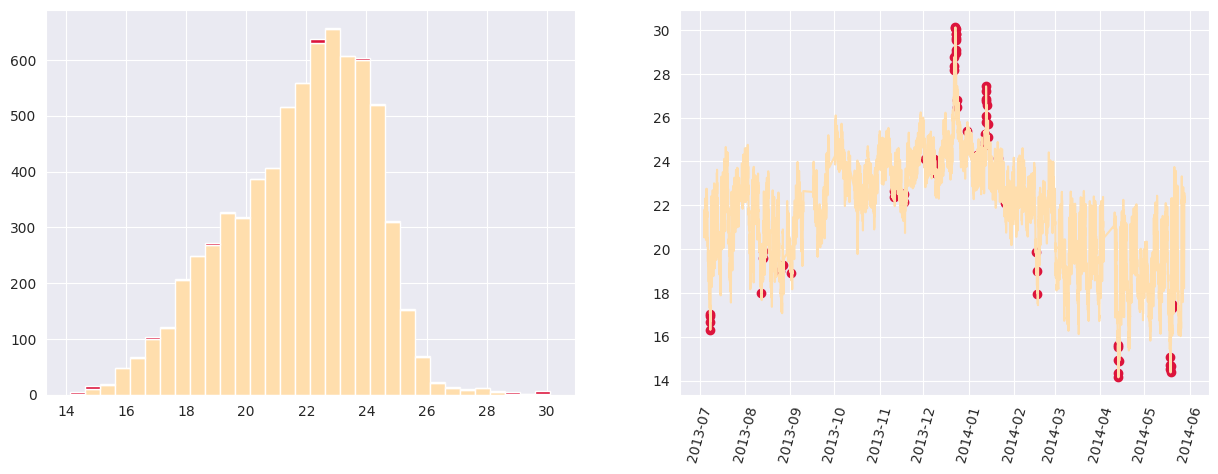

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

a = df.loc[df['OneClassSVM'] == 1, ['timestamp', 'value']]

ax[1].plot(df['timestamp'], df['value'], color='navajowhite')
ax[1].scatter(a['timestamp'], a['value'], color='crimson')

a = df.loc[df['OneClassSVM'] == 0, 'value']
b = df.loc[df['OneClassSVM'] == 1, 'value']
ax[0].hist([a,b], bins=32, stacked=True, color=['navajowhite', 'crimson'])

plt.xticks(rotation=75)
plt.show()

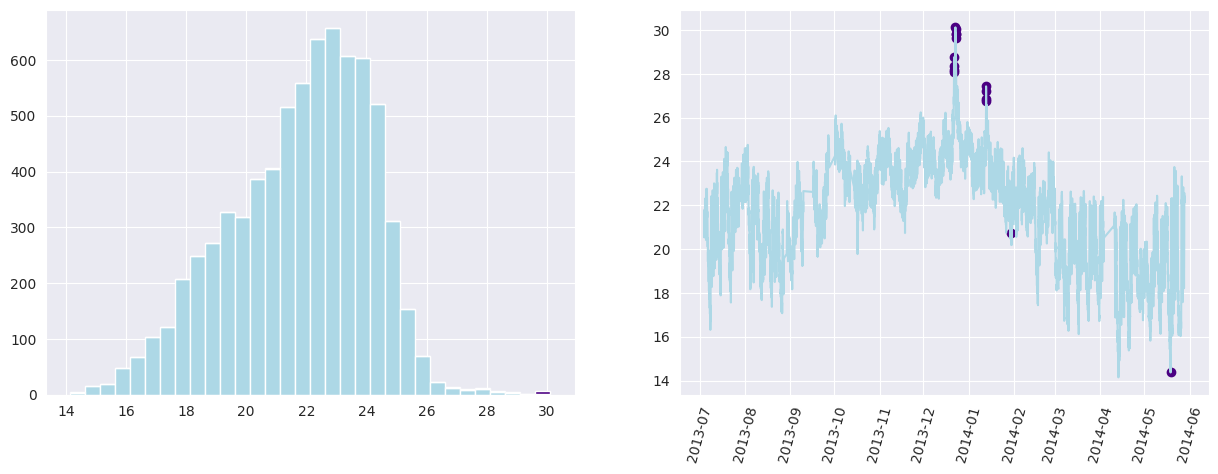

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

a = df.loc[df['LocalOutlierFactor'] == 1, ['timestamp', 'value']]

ax[1].plot(df['timestamp'], df['value'], color='lightblue')
ax[1].scatter(a['timestamp'], a['value'], color='indigo')

a = df.loc[df['LocalOutlierFactor'] == 0, 'value']
b = df.loc[df['LocalOutlierFactor'] == 1, 'value']
ax[0].hist([a,b], bins=32, stacked=True, color=['lightblue', 'indigo'])

plt.xticks(rotation=75)
plt.show()